<a href="https://colab.research.google.com/github/jeongmin5o/-DA-CLV/blob/main/CRM%26CLV_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. EDA**

## 1-1. Raw Data





**Raw Data**

5623810 *13

고객 정보: 544,921 고객

|Column|customer_id|created_at|pre_discount|post_discount|cashback_amount|discount_amount|total_promotion|
|--|--|--|--|--|--|--|--|
|**Dictionay**|고객식별번호|결제일시|할인 전|할인 후(결제금액)|적립금액|할인금액|총 혜택 받은 금액|
|**Dtype**|int64|object|int64|int64|int64|int64|int64|
|**Data**|1~544,921|yyyy-mm-dd hh:mm:ss.sss|1~1,996,000|0~1,996,000|0~97,473|0~500,000|0~500,000|



|Column|push_permission|gender|is_foreigner|birthday|sign_up_date|merchant_id|
|--|--|--|--|--|--|--|
|**Dictionay**|푸시 여부|성별|외국인 여부|생년월일|가입일시|판매자식별번호(결제채널)|
|**Dtype**|bool|object|bool|object|object|int64|
|**Data**|True/False|female/male|True/False|yyyy-mm-dd|yyyy-mm-dd hh:mm:ss.sss|1~10|

##[Run] 1-3. 이상치제거

### 나이

**birthday**

*   **Outlier : 1900-01-01**
  - 8913건, 3902명
  - 1900-01-01 은 이상치이므로 Delete / Predict 할 예정이다. ●
  - created_at 과 sign_up_date 가 2020-01-09 까지 존재하는 것으로 보아, 2020-01-09 이후 회원가입 시스템이 변경되었을 수 있다.
*   1919-05-15
- 1926-02-20
- ...


In [ ]:
# birthday 로 나이 계산
# 결제 시점에서의 나이 
last =pd.to_datetime('2020-04-01 23:59:14.018000')
data['age'] = last.year - data['birthday'].dt.year

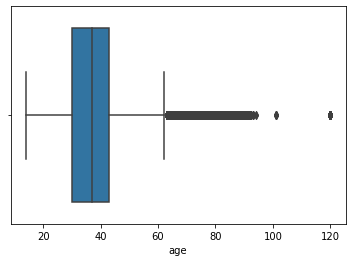

In [ ]:
sns.boxplot(data['age'])

In [ ]:
iqr = np.percentile(data['age'], 75) - np.percentile(data['age'], 25)
np.percentile(data['age'], 50) + iqr*1.5


56.5

In [ ]:
# 이상치 제거 기준 : 57세
data = data[data['age']<57]

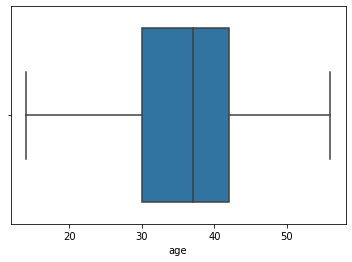

In [ ]:
sns.boxplot(data['age'])

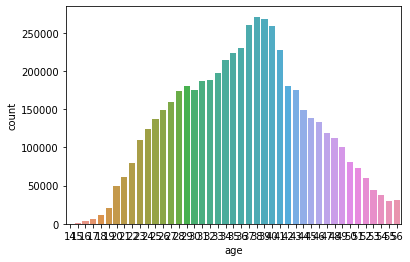

In [ ]:
sns.countplot(data['age'])

### merchant_id 제거

In [ ]:
data.drop('merchant_id',axis = 1, inplace = True)

In [ ]:
data.head(3)

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,age
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,37
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,45
3,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,24


### 2. 동일한날 동일한 금액 구매 건수

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432779 entries, 1 to 5623809
Data columns (total 13 columns):
 #   Column           Dtype         
---  ------           -----         
 0   customer_id      object        
 1   created_at       datetime64[ns]
 2   pre_discount     int64         
 3   post_discount    int64         
 4   cashback_amount  int64         
 5   discount_amount  int64         
 6   total_promotion  int64         
 7   push_permission  bool          
 8   gender           object        
 9   is_foreigner     object        
 10  birthday         datetime64[ns]
 11  sign_up_date     datetime64[ns]
 12  age              int64         
dtypes: bool(1), datetime64[ns](3), int64(6), object(3)
memory usage: 544.0+ MB


In [ ]:
data['created_day'] = data['created_at'].dt.strftime('%Y-%m-%d')

In [ ]:
a = pd.DataFrame(data.groupby(['customer_id','created_day','pre_discount'])['pre_discount'].count().reset_index(name='동시구매수'))
a

,customer_id,created_day,pre_discount,동시구매수
0,1,2019-08-25,10110,1
1,1,2019-08-27,14220,1
2,10,2020-02-05,5900,1
3,10,2020-02-19,18690,1
4,1000,2020-01-21,28200,1
...,...,...,...,...
5244146,99996,2020-01-13,846000,1
5244147,99996,2020-01-20,564000,1
5244148,99998,2019-11-24,5715,1
5244149,99998,2020-02-24,11800,1


In [ ]:
data = pd.merge(data,a, on=['customer_id','created_day','pre_discount'], how = 'left')
data.head(3)

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,age,created_day,동시구매수
0,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,37,2020-03-12,1
1,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,45,2020-02-01,1
2,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,24,2020-03-06,1


In [ ]:
# 동시구매수 ==1 인 데이터
data_1 = data[data['동시구매수'] == 1]
data_2 = data[data['동시구매수'] >=2]

**[ 총 3개의 데이터 셋 ]**

1. 동일한 날짜에 동일한 금액을 구매한 것을 제외한 데이터: data_1


  > **1-1. data_1의 고객정보: customer_info**

    - 고객 정보:525,670 명 

|Column|customer_id|gender|is_foreigner|birthday|mercsign_up_date|age
|--|--|--|--|--|--|--|
|**Dictionay**|고객식별번호|성별|외국인 여부|생년월일|가입일시|나이|
|**Dtype**|object|object|bool|datetime64[ns]|datetime64[ns]|int64|
|**Data**|1~544,921|female/male|True/False|yyyy-mm-dd|yyyy-mm-dd hh:mm:ss.sss|14~120|

\\
  > **1-2. data_1의 고객 구매정보: purchase_info**

   결제정보: 5,095,653 건


|Column|customer_id|created_at|pre_discount|post_discount|cashback_amount|discount_amount|total_promotion|push_permission|merchant_id|
|--|--|--|--|--|--|--|--|--|--|
  |**Dictionay**|고객식별번호|결제일시|할인 전|할인 후(결제금액)|적립금액|할인금액|총 혜택 받은 금액|푸쉬 여부|결제채널|
  |**Dtype**|object|datetime64[ns]|int64|int64|int64|int64|int64|int64|bool|int64|
  |**Data**|1~544,92|yyyy-mm-dd hh:mm:ss.sss|1~1,996,000|0~1,996,000|0~97,473|0~500,000|0~500,000|T/F|1~9|

---
\\

**2. 동일한 날짜에 동일한 금액을 구매한 데이터: data_2**
  - 고객 수: 69,311 명
  - 결제정보: 337,126 건

In [ ]:
data_1.head(3)

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,age,created_day,동시구매수
0,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,37,2020-03-12,1
1,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,45,2020-02-01,1
2,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,24,2020-03-06,1


In [ ]:
print(data_1.shape)
print(data_2.shape)

(5095653, 15)
(337126, 15)




## **[Run]** 1-3. Final Data 


**Variable**
- count
- weekday, hour, is_covid_A, is_covid_B
- gender, age, push_permission
- cashback_R, cashback_F(is_cashback), cashback_M(cashback_amount)

**CLV** 
= (M-c)/(1-r+i) - AC
- M-c = 평균 결제금액 (pre_discount - discount_amount = post_discount)
- r = 평균 재구매율 
- i = 평균 할인율
- AC = 0



In [ ]:
# customer_id
# 구매한 건수를 카운트하기 위해
data_1['count'] = 1

In [ ]:
# created_at 날짜를 월/ 일/ 요일 컬럼 추가
data_1['weekday'] = data_1['created_at'].dt.weekday # 0: 월요일
data_1['weekday'].replace({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu',
                         4:'Fri', 5:'Sat', 6:'Sun'}, inplace=True)

data_1['days'] = data_1['created_at'].dt.strftime('%Y-%m-%d')
data_1['is_covid_A'] =  np.where(data_1['days'] < '2020-01-20', False, True) # 첫 확진자 발생일 이전이면 False, 이후면 True
data_1['is_covid_B'] = np.where(data_1['days'] < '2020-03-22', False, True) # 사회적 거리두기 시행 이전이면 False, 이후이면 True

In [ ]:
# cashback_amount

data_1['cashback_rate'] = data_1['cashback_amount'] / data_1['pre_discount'] * 100  # 캐쉬백 할인율
data_1['is_cashback'] = np.where(data_1['cashback_amount'] == 0, False, True)      # 캐쉬백 유무

# discount_amount
data_1['discount_rate'] = data_1['discount_amount'] / data_1['pre_discount'] * 100   # 할인받은 비율
data_1['is_discount'] = np.where(data_1['discount_amount'] == 0, False, True)      # 할인 받은 유무

# total_promotion
data_1['promotion_rate'] = data_1['total_promotion'] / data_1['pre_discount'] * 100    #총 할인받은 비율
data_1['is_promotion'] = np.where(data_1['total_promotion'] == 0, False, True)       # 총 할인받은 유무

In [ ]:
# 나이 그룹화하기

data_1['age_category'] = (data_1['age'] // 10) * 10
data_1['age_category'] = data_1['age_category'].astype('object')

In [ ]:
customer_info = data_1[['customer_id','gender','is_foreigner','age','birthday','sign_up_date','age_category']]
purchase_info = data_1[['customer_id','created_at','weekday','pre_discount','post_discount','is_cashback','cashback_amount','cashback_rate','discount_amount','discount_rate','is_discount','total_promotion','push_permission','is_covid_A','is_covid_B','count']]

In [ ]:
customer_info.drop_duplicates(subset = 'customer_id',keep='first', inplace = True)

# **2. 재구매율**

## 재구매율 - cohort analysis

In [ ]:
# MonthPassed
# 첫 구매일로부터 지난 월 수 
# 컬럼 소개 year = 구매한 달, month = 구매 년-월, MonthStarted = 첫 구매달, MonthPassed = 첫 구매로부터 지난 개월 수

#  freq='A': 1년의 기간
#  freq='M' 1개월의 기간
# freq='D' : 1일의 기간
cohort_ana = data_1.copy()
cohort_ana['year'] = cohort_ana['created_at'].dt.to_period(freq='A')
cohort_ana['month'] = cohort_ana['created_at'].dt.to_period(freq='M')

month_group = cohort_ana.groupby('customer_id')['month']
cohort_ana['MonthStarted'] = month_group.transform(np.min)

cohort_ana['MonthPassed'] = (cohort_ana['month'].dt.year - cohort_ana['MonthStarted'].dt.year) * 12 + \
    (cohort_ana['month'].dt.month - cohort_ana['MonthStarted'].dt.month)

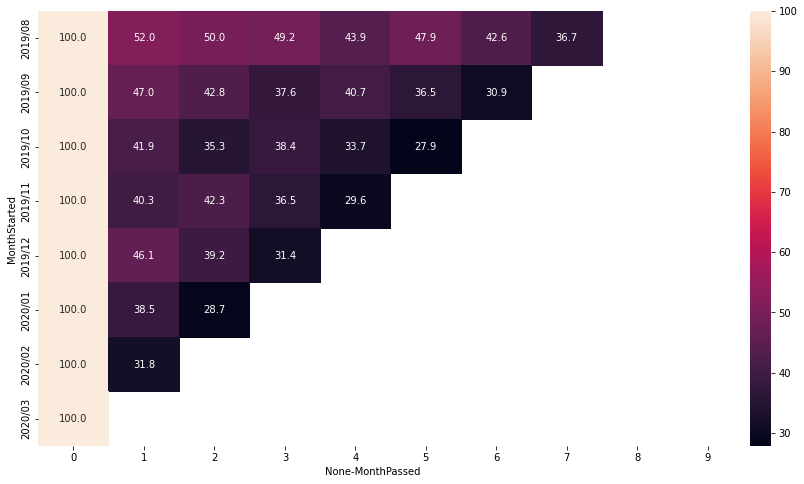

In [ ]:
# 첫구매 년-월로 결제자들 그룹화해서 시간에 따른(개월수 기준) 재구매율 확인하기

def get_unique_no(x):
    return len(np.unique(x))

cohort_group = cohort_ana.groupby(['MonthStarted', 'MonthPassed'])
cohort_df = cohort_group['customer_id'].apply(get_unique_no).reset_index()

cohort_df = cohort_df.pivot(index='MonthStarted', columns='MonthPassed')

customer_cohort = cohort_df.div(cohort_df.iloc[:, 0], axis=0) * 100     # a.div(b, axis = 0)   -> a를 b로 나눈다 행(0)으로
customer_cohort = customer_cohort.round(decimals=2)                     # 즉, 첫번째 열로 나머지 열들을 나누는 것 = 첫 구매 달 구매한 사람 수로 나누는 것

xticks = np.arange(0, 10)
yticks = ['2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03']

plt.figure(figsize = (15, 8))
sns.heatmap(customer_cohort, 
            annot=True,   # 각 셀에 숫자 입력
            xticklabels=xticks,
            yticklabels=yticks, 
            fmt='.1f')

In [ ]:
customer_cohort

customer_id                                                
MonthPassed            0      1      2      3      4      5      6     7
MonthStarted                                                            
2019-08            100.0  51.99  49.96  49.16  43.91  47.94  42.65  36.7
2019-09            100.0  46.97  42.84  37.57  40.68  36.50  30.89   NaN
2019-10            100.0  41.93  35.31  38.40  33.66  27.88    NaN   NaN
2019-11            100.0  40.27  42.29  36.53  29.62    NaN    NaN   NaN
2019-12            100.0  46.08  39.23  31.36    NaN    NaN    NaN   NaN
2020-01            100.0  38.51  28.66    NaN    NaN    NaN    NaN   NaN
2020-02            100.0  31.76    NaN    NaN    NaN    NaN    NaN   NaN
2020-03            100.0    NaN    NaN    NaN    NaN    NaN    NaN   NaN

In [ ]:
a = cohort_df.sum(axis = 0)
a

             MonthPassed
customer_id  0              525670.0
             1              225094.0
             2              191901.0
             3              162544.0
             4              132536.0
             5              122003.0
             6               96117.0
             7               68510.0
dtype: float64

In [ ]:
a.div(a.iloc[0],axis=0)*100

             MonthPassed
customer_id  0              100.000000
             1               42.820401
             2               36.505983
             3               30.921300
             4               25.212776
             5               23.209048
             6               18.284665
             7               13.032891
dtype: float64

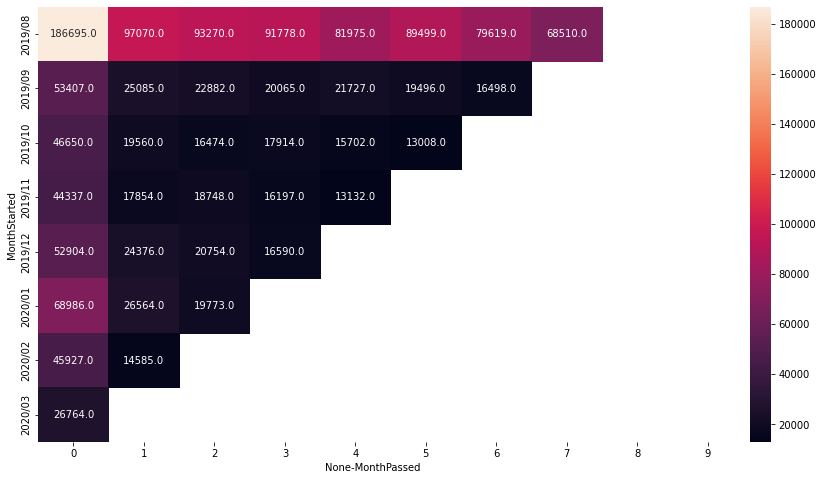

In [ ]:
plt.figure(figsize = (15, 8))


sns.heatmap(cohort_df, 
            annot=True,   # 각 셀에 숫자 입력
            xticklabels=xticks,
            yticklabels=yticks, 
            fmt='.1f')

In [ ]:
a = cohort_df.iloc[0,0]  #8월
b = cohort_df.iloc[1,0]  #9월
c= cohort_df.iloc[2,0]  #10월
d= cohort_df.iloc[3,0]  #11월
e= cohort_df.iloc[4,0]  #12월
f= cohort_df.iloc[5,0]  #1월
g=cohort_df.iloc[6,0]  #2월
h=cohort_df.iloc[7,0]  #3월


# 전월대비 
m_l = [ (cohort_df.iloc[0,0] - cohort_df.iloc[1,0])/cohort_df.iloc[0,0]*100, (b-c)/b*100, (c-d)/c*100,(d-e)/d*100, (e-f)/e*100, (f-g)/f, (g-h)/g*100  ]
m_l

[71.39344920860226,
 12.6518995637276,
 4.958199356913183,
 -19.322462052010735,
 -30.398457583547554,
 0.3342562259009074,
 41.724911272236376]

## 재구매율 - customer analysis

In [ ]:
# 전체 데이터로부터 고객 당 최초 구매, 마지막 구매, 구매횟수를 구해 테이블을 만들어보자..
first = pd.DataFrame(data_1.groupby('customer_id')['created_at'].min()) # 최초 구매
last = pd.DataFrame(data_1.groupby('customer_id')['created_at'].max()) # 마지막 구매
buy_ct = pd.DataFrame(data_1.groupby('customer_id')['created_at'].count()) # 구매횟수
rebuy= pd.concat([first,last],axis=1) # 테이블 병합
rebuy = pd.concat([rebuy,buy_ct], axis=1)
rebuy.columns = ['first','last','buy_ct']
rebuy

,first,last,buy_ct
customer_id,,,
1,2019-08-25 18:41:15.118,2019-08-27 10:46:45.237,2
10,2020-02-05 12:11:42.293,2020-02-19 00:28:45.467,2
1000,2020-01-21 16:16:32.192,2020-01-21 16:16:32.192,1
10000,2020-01-13 17:27:17.488,2020-01-13 17:27:17.488,1
100000,2019-09-16 23:22:24.599,2019-09-16 23:22:24.599,1
...,...,...,...
99994,2019-09-09 13:33:44.292,2020-01-18 11:31:00.114,4
99995,2019-08-26 10:31:30.398,2020-02-19 20:44:34.321,5
99996,2020-01-11 00:32:25.375,2020-01-20 21:55:29.067,9


In [ ]:
# first, last컬럼이 datetime타입이 아니라면 실행
rebuy['first'] = pd.to_datetime(rebuy['first'])
rebuy['last'] = pd.to_datetime(rebuy['last'])

In [ ]:
rebuy['term'] = rebuy['last'] - rebuy['first'] # 전체 구매 기간
rebuy['term'] = rebuy['term'].apply(lambda x : x.days) # 일자만 보이게 세팅

# 구매주기 구하기
# 구매기간 / (구매횟수 -1) 이라서 대략적인 구매주기이다, 정확한 구매주기는 아님
rebuy['cycle'] = rebuy['term']/(rebuy['buy_ct']-1)
rebuy['cycle'] = rebuy['cycle'].fillna(0)
rebuy

,first,last,buy_ct,term,cycle
customer_id,,,,,
1,2019-08-25 18:41:15.118,2019-08-27 10:46:45.237,2,1,1.000000
10,2020-02-05 12:11:42.293,2020-02-19 00:28:45.467,2,13,13.000000
1000,2020-01-21 16:16:32.192,2020-01-21 16:16:32.192,1,0,0.000000
10000,2020-01-13 17:27:17.488,2020-01-13 17:27:17.488,1,0,0.000000
100000,2019-09-16 23:22:24.599,2019-09-16 23:22:24.599,1,0,0.000000
...,...,...,...,...,...
99994,2019-09-09 13:33:44.292,2020-01-18 11:31:00.114,4,130,43.333333
99995,2019-08-26 10:31:30.398,2020-02-19 20:44:34.321,5,177,44.250000
99996,2020-01-11 00:32:25.375,2020-01-20 21:55:29.067,9,9,1.125000


## 재구매 heat-map으로 보기

### 성별

In [ ]:
# 재구매_히트맵 보기
# x: 데이터 y: 조건 줄 컬럼명 z: 조건
def rebuy_heatmanp(x,y,z):
  select_data = x[x[y] == z]
  data_group = select_data.groupby(['MonthStarted', 'MonthPassed'])
  data_df = data_group['customer_id'].apply(get_unique_no).reset_index()

  data_df = data_df.pivot(index='MonthStarted', columns='MonthPassed')

  data_cohort = data_df.div(data_df.iloc[:, 0], axis=0) * 100
  data_cohort = data_cohort.round(decimals=2)

  xticks = np.arange(0, 10)
  yticks = ['2019/08', '2019/09', '2019/10', '2019/11', '2019/12', '2020/01', '2020/02', '2020/03']

  plt.figure(figsize = (15, 8))
  plt.title(z)
  
  return sns.heatmap(data_cohort, 
              annot=True, 
              xticklabels=xticks,
              yticklabels=yticks, 
              fmt='.1f')





In [ ]:
a = [1,2,3,4,5]
min(a)

1

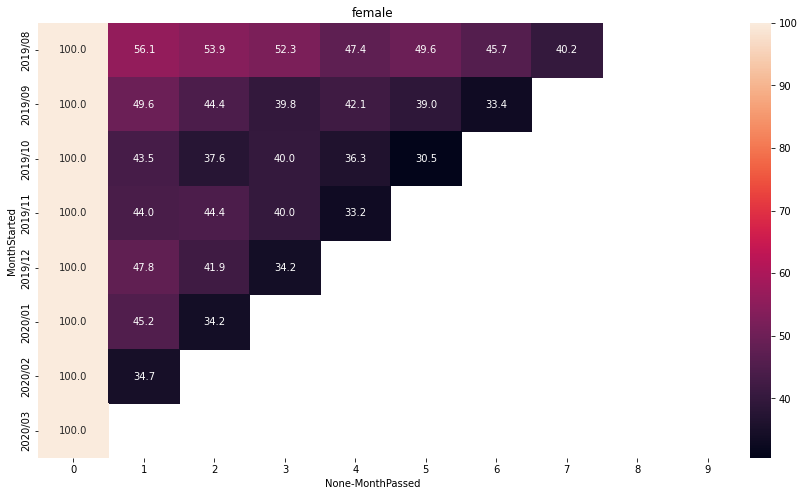

In [ ]:
rebuy_heatmanp(cohort_ana,'gender','female')

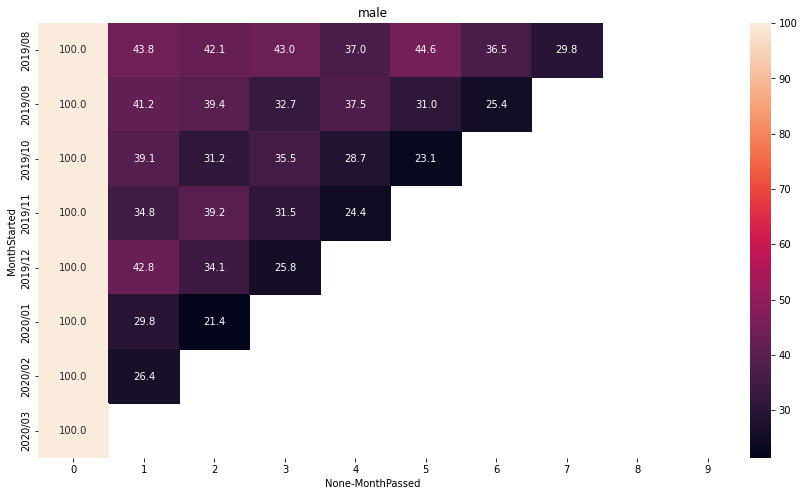

In [ ]:
# 남성 그룹
rebuy_heatmanp(cohort_ana,'gender','male')

### 연령

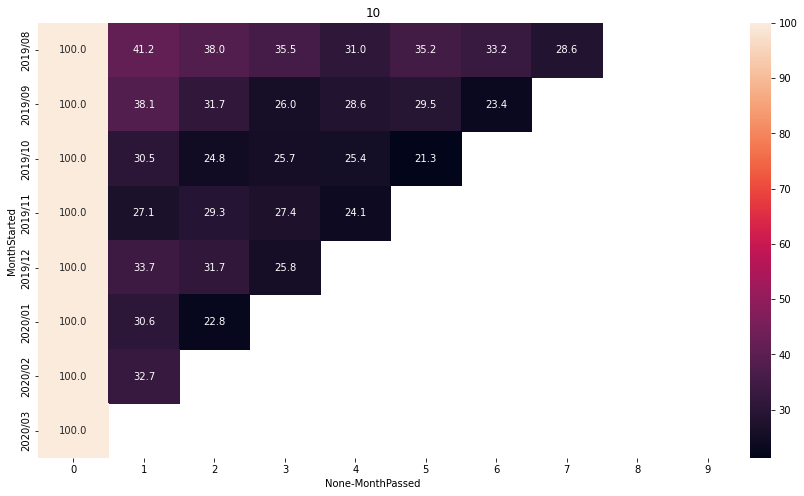

In [ ]:
rebuy_heatmanp(cohort_ana,'age_category',10)

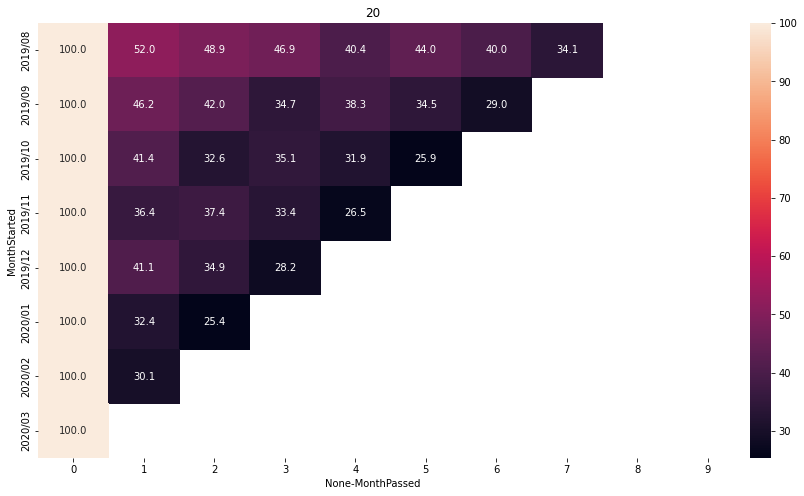

In [ ]:
rebuy_heatmanp(cohort_ana,'age_category',20)

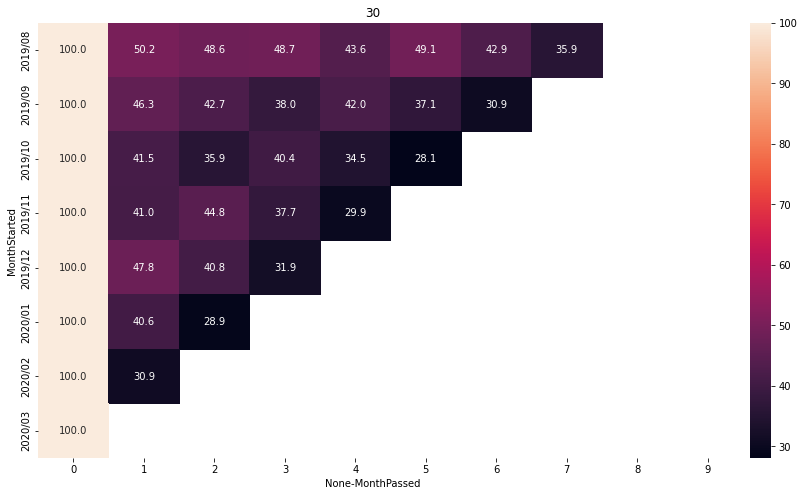

In [ ]:
rebuy_heatmanp(cohort_ana,'age_category',30)

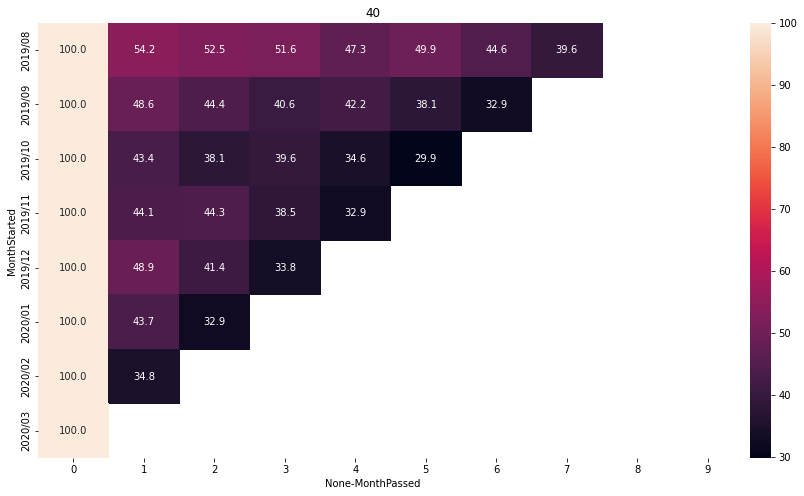

In [ ]:
rebuy_heatmanp(cohort_ana,'age_category',40)

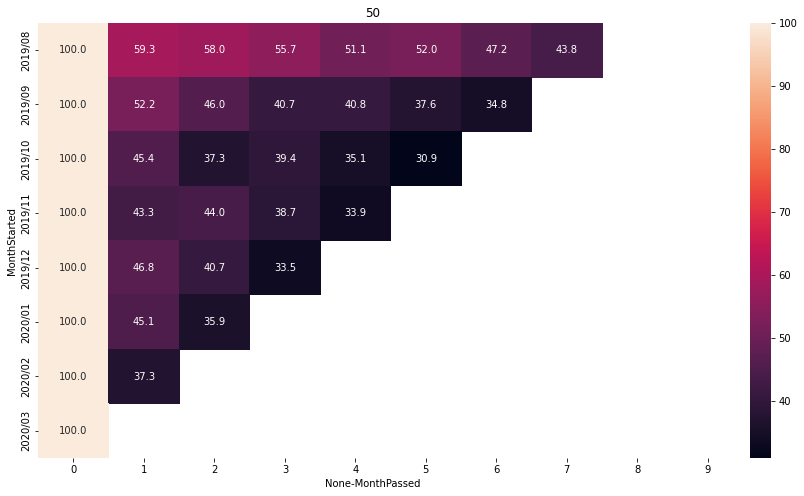

In [ ]:
rebuy_heatmanp(cohort_ana,'age_category',50)

## 재구매 lineplot으로 보기

### 성별

In [ ]:
def line_cohort(x, y):
  line_cohor_dt =  cohort_ana[cohort_ana[x] == y]
  line_cohort_group = line_cohor_dt.groupby(['MonthStarted', 'MonthPassed'])
  line_cohort_df = line_cohort_group['customer_id'].apply(get_unique_no).reset_index()

  month_0 = line_cohort_df[line_cohort_df['MonthPassed'] == 0]['customer_id'].reset_index(drop=True)
  month_1 = line_cohort_df[line_cohort_df['MonthPassed'] == 1]['customer_id'].reset_index(drop=True)
  month_2 = line_cohort_df[line_cohort_df['MonthPassed'] == 2]['customer_id'].reset_index(drop=True)
  month_3 = line_cohort_df[line_cohort_df['MonthPassed'] == 3]['customer_id'].reset_index(drop=True)
  month_4 = line_cohort_df[line_cohort_df['MonthPassed'] == 4]['customer_id'].reset_index(drop=True)
  month_5 = line_cohort_df[line_cohort_df['MonthPassed'] == 5]['customer_id'].reset_index(drop=True)
  month_6 = line_cohort_df[line_cohort_df['MonthPassed'] == 6]['customer_id'].reset_index(drop=True)
  month_7 = line_cohort_df[line_cohort_df['MonthPassed'] == 7]['customer_id'].reset_index(drop=True)

 
  
  fmonthPassed = []
  

  fmonthPassed.append((month_1.div(month_0) * 100).mean())
  fmonthPassed.append((month_2.div(month_0) * 100).mean())
  fmonthPassed.append((month_3.div(month_0) * 100).mean())
  fmonthPassed.append((month_4.div(month_0) * 100).mean())
  fmonthPassed.append((month_5.div(month_0) * 100).mean())
  fmonthPassed.append((month_6.div(month_0) * 100).mean())
  fmonthPassed.append((month_7.div(month_0) * 100).mean())

  monthDate = ['1 Month', '2 Month', '3 Month', '4 Month', '5 Month', '6 Month', '7 Month']
  monthDate = pd.Series(monthDate)
  fmonthPassed = pd.Series(fmonthPassed)
  fremonth = pd.concat([fmonthPassed, monthDate], axis = 1)
  return  sns.lineplot(y = fremonth[0], x = fremonth[1], data = fremonth)
 

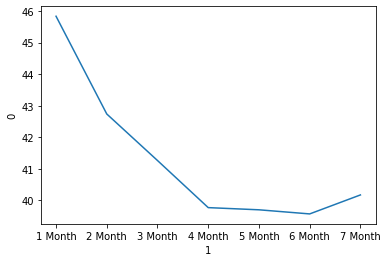

In [ ]:
line_cohort('gender','female')

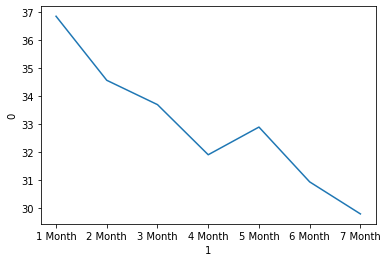

In [ ]:
line_cohort('gender','male')

# **3. RFM**


R : 최근 방문일

- recency = 최근


In [ ]:
# 최근 방문일
## 각 고객별 최근방문일을 알아보자.
recency_df = pd.DataFrame(data_1.groupby('customer_id',as_index=False)['created_at'].max()) ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 송장날짜에 max를 적용한다.
recency_df.columns = ['customer_id', 'LastPurchaseDate']



In [ ]:

# 최근 방문일로부터 얼마나 지났는지 
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (data_1['created_at'].max() - x).days)
recency_df.drop(columns =['LastPurchaseDate'],inplace = True )

F : 결제 빈도

- frequency = 고객 ID groupby후 created_at을 카운트


In [ ]:
## 각 고객별 구매횟수를 알아보자.
frequency_df = data_1.loc[:,('customer_id','counts')]
frequency_df

M : 기업에 대한 고객의 금전적 이익

- monetary = 고객 ID groupby후 post_discount의 합

In [ ]:
money = pd.DataFrame(data_1.groupby('customer_id',as_index=False)['post_discount'].sum())
money

,customer_id,post_discount
0,1,18960
1,10,22590
2,100,477525
3,1000,27300
4,10000,27150
...,...,...
544916,99995,114840
544917,99996,2861400
544918,99997,48230
544919,99998,14880


In [ ]:
## 데이터 병합
rfm_df = pd.concat([money,recency_df],axis=1) # money에 recency합치기
rfm = pd.concat([rfm_df,frequency_df],axis=1) # frequency합치기
rfm.columns = ['monetary','recency','frequency'] # 열의 이름 바꿔주기
rfm['recency'] = pd.to_datetime(rfm['recency']) # recency파일 날짜 형식으로 바꾸기
rfm['recency'] = rfm['recency'].dt.to_period(freq='M') # recency에 년-월 형식으로만 나올수 있게 하기
rfm

In [ ]:
# min_max 스케일링
from sklearn.preprocessing import minmax_scale

## 최근성: 숫자가 작을수록 좋음
# 즉, 최근 구매일이 얼마 지나지 않은 고객이 더 점수가 높음

rfm['Recency'] = minmax_scale(rfm['Recency'], axis = 0, copy = True )
#행기준으로, 카피해서 만들기
rfm['Recency'] = 1 - rfm['Recency']  # 작은값이 좋기 때문에, 1에서 빼줌(반전)


rfm['Frequency'] = minmax_scale(rfm['Frequency'], axis = 0, copy = True )
rfm['Monetary'] = minmax_scale(rfm['Monetary'], axis = 0, copy = True )


# 점수화하기
# score
rfm['Score'] = rfm['Recency'] + rfm['Frequency'] + rfm['Monetary']


# score 에 minmax_scale 적용
# 100을 곱해서 100점 만점으로 스케일링

rfm['Score'] = minmax_scale(rfm['Score'], axis = 0, copy = True) * 100

rfm['Score'] = round(rfm['Score'], 0)
rfm.head(3)

# **4. CLV(고객생애가치)**


## 1) lifetime package

### RTFM 구하기

In [ ]:
data_1.head(5)

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,age,created_day,동시구매수,count,weekday,days,is_covid_A,is_covid_B,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age_category
0,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,37,2020-03-12,1,1,Thu,2020-03-12,True,False,3.0,True,0.0,False,3.0,True,30
1,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,45,2020-02-01,1,1,Sat,2020-02-01,True,False,3.0,True,0.0,False,3.0,True,40
2,15552,2020-03-06 10:23:21.183,11800,11800,354,0,354,False,male,False,1996-08-21,2019-08-06 02:09:28.712,24,2020-03-06,1,1,Fri,2020-03-06,True,False,3.0,True,0.0,False,3.0,True,20
3,511595,2020-03-13 12:00:27.914,29700,29700,891,0,891,True,female,False,1999-01-23,2020-03-12 00:33:46.147,21,2020-03-13,1,1,Fri,2020-03-13,True,False,3.0,True,0.0,False,3.0,True,20
4,542961,2020-03-02 19:32:27.893,30900,30900,927,0,927,False,female,False,1979-08-12,2019-06-27 11:38:07.948,41,2020-03-02,1,1,Mon,2020-03-02,True,False,3.0,True,0.0,False,3.0,True,40


In [ ]:
rft = data_1[['customer_id','created_at']]
rft

,customer_id,created_at
0,95246,2020-03-12 09:41:09.845
1,208074,2020-02-01 08:54:53.246
2,15552,2020-03-06 10:23:21.183
3,511595,2020-03-13 12:00:27.914
4,542961,2020-03-02 19:32:27.893
...,...,...
5432774,434398,2019-12-12 07:48:51.491
5432775,481515,2019-12-20 07:37:15.259
5432776,298192,2020-01-05 01:55:28.331
5432777,430962,2019-10-01 03:32:17.435


In [ ]:
from lifetimes.utils import summary_data_from_transaction_data

# 최근 방문일
last =pd.to_datetime('2020-04-01 23:59:14.018000')

summary = summary_data_from_transaction_data(rft, 'customer_id', 'created_at', observation_period_end=last)

print(summary.head())

             frequency  recency      T
customer_id                           
1                  1.0      2.0  220.0
10                 1.0     14.0   56.0
1000               0.0      0.0   71.0
10000              0.0      0.0   79.0
100000             0.0      0.0  198.0


In [ ]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.0)  #  0.001에서 0.1 정도
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

<lifetimes.BetaGeoFitter: fitted with 525670 subjects, a: 0.25, alpha: 9.27, b: 4.22, r: 0.46>

고객 예측\
: 고객 이력을 기반으로 개인의 향후 구매가 어떻게 될 것인지 예측

In [ ]:
t = 10 #predict purchases in 10 periods
individual = summary.iloc[20]
# The below function is an alias to `bfg.conditional_expected_number_of_purchases_up_to_time`
bgf.predict(t, individual['frequency'], individual['recency'], individual['T'])
# 0.0576511

0.13319294406905394

감마-감마 모델을 사용한 고객평생가치 추정

  - 그동안 우리는 각 거래의 경제적 가치를 고려하지 않았고 주로 거래의 발생에 집중했습니다.
  -  이를 추정하기 위해 Gamma-Gamma 하위 모델을 사용할 수 있습니다. 
  - 먼저 각 거래에 대한 경제적 가치(즉, 이익 또는 수익)를 포함하는 거래 데이터에서 요약 데이터를 생성해야 합니다.



```
monetary_value
```


- 자신의 데이터에서 금전적 가치를 계산하는 경우 합계 가 아니라 주어진 고객 가치의 평균이라는 점에 유의
- 각 고객에 대해 일관되게 계산되는 한 이익, 수익 또는 모든 가치를 나타내는 데 사용할 수 있음

In [ ]:
# monetary_value 수기로 구하기
money = data_1.groupby('customer_id',as_index=False).agg({ 'pre_discount': 'sum',
                                                                       'created_at':'count' })

money['monetary_value'] = round(money['pre_discount']/money['created_at'])
money = money[['customer_id','monetary_value']]

In [ ]:
returning_customers_summary = pd.merge(summary ,money,on='customer_id',how = 'left')
returning_customers_summary = returning_customers_summary[returning_customers_summary['frequency']>0]

print(returning_customers_summary.head())

  customer_id  frequency  recency      T  monetary_value
0           1        1.0      2.0  220.0         12165.0
1          10        1.0     14.0   56.0         12295.0
5      100001        2.0     57.0  230.0         16500.0
8      100004        9.0    174.0  177.0          9261.0
9      100005        8.0    105.0  164.0         16027.0


감마-감마 모델과 독립 가정

  - 사용자 기반의 CLV를 추정하는 데 사용할 모델을 Gamma-Gamma 하위 모델이라고 함
  - 실제로 감마-감마 하위 모델은 **금전적 가치와 구매 빈도 사이에 관계가 없다고 가정**합니다.
  -  실제로 이 모델을 사용하려면 두 벡터 간의 Pearson 상관 관계가 0에 가까운지 확인해야 합니다.

In [ ]:
returning_customers_summary[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.000000,-0.079471
frequency,-0.079471,1.000000


-> 이 시점에서 우리는 감마-감마 하위 모델을 훈련하고 고객의 조건부 예상 평균 평생 가치를 예측할 수 있습니다.

In [ ]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers_summary['frequency'],
        returning_customers_summary['monetary_value'])
print(ggf)

<lifetimes.GammaGammaFitter: fitted with 355966 subjects, p: 8.49, q: 3.63, v: 6662.26>


평균 거래 가치 추정

In [ ]:
print(ggf.conditional_expected_average_profit(
        summary_with_money_value['frequency'],
        summary_with_money_value['monetary_value']
    ).head(10))

customer_id
1      2903.254302
2      5094.088405
3     21480.662462
4     21480.662462
5     21480.662462
6       981.981978
7      5094.088405
8     21480.662462
9      2906.024684
10    21480.662462
dtype: float64


In [ ]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        summary_with_money_value['frequency'],
        summary_with_money_value['monetary_value']
    ).mean(),
    summary_with_money_value[summary_with_money_value['frequency']>0]['monetary_value'].mean()
))

Expected conditional average profit: 14258.248264634058, Average profit: 35.07855179704017


In [ ]:
# refit the BG model to the summary_with_money_value dataset
bgf.fit(summary_with_money_value['frequency'], summary_with_money_value['recency'], summary_with_money_value['T'])

print(ggf.customer_lifetime_value(
    bgf, #the model to use to predict the number of future transactions
    summary_with_money_value['frequency'],
    summary_with_money_value['recency'],
    summary_with_money_value['T'],
    summary_with_money_value['monetary_value'],
    time=12, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
).head(10))

customer_id
1     16494.637954
2      5102.704425
3     23318.756581
4     23318.756581
5     23318.756581
6     13794.307868
7      7571.760740
8     23318.756581
9     17832.791665
10    23318.756581
Name: clv, dtype: float64


### BG/NBD

In [ ]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.001)
#setting up the model
bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])
#fitting of all dataset

<lifetimes.BetaGeoFitter: fitted with 524374 subjects, a: 0.89, alpha: 0.02, b: 6.46, r: 0.23>

In [ ]:
cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                              cltv_df['frequency'],
                                              cltv_df['recency'],
                                              cltv_df['T'])
# 위의 함수 = predict 같은 거임 

cltv_df['expected_purc_1_month'] = bgf.predict(4,
 cltv_df['frequency'],
 cltv_df['recency'],
 cltv_df['T'])

In [ ]:
cltv_df

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month
customer_id,,,,,,
1,31.142857,31.428571,2,9480.000000,6.451636e-02,2.545476e-01
10,6.000000,8.000000,2,11295.000000,2.292732e-01,8.721868e-01
100,3.285714,31.285714,42,11369.642857,3.386397e-40,1.305871e-39
100001,24.714286,32.857143,3,14933.333333,7.902427e-02,3.111992e-01
100004,0.428571,25.285714,11,8435.636364,1.241306e-19,4.801857e-19
...,...,...,...,...,...,...
99992,5.428571,34.714286,6,39660.000000,2.136418e-05,8.377807e-05
99994,10.571429,29.285714,4,29090.000000,1.823724e-02,7.152140e-02
99995,6.000000,31.285714,5,22968.000000,3.415837e-04,1.338786e-03


In [ ]:
# 한달 매출이 어떻게 될까?
bgf.predict(4,cltv_df['frequency'],cltv_df['recency'],cltv_df['T']).sum()  # 4 = 4주

87023.20060081087

In [ ]:
from lifetimes.plotting import plot_period_transactions

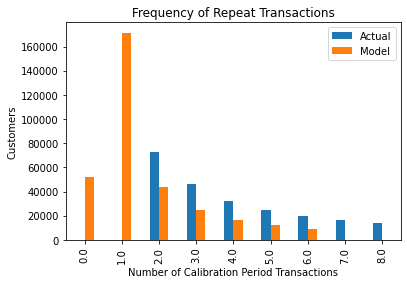

In [ ]:
plot_period_transactions(bgf)
plt.show()

### Gamma/Gamma

In [ ]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 381694 subjects, p: 2.64, q: 0.14, v: 2.59>

In [ ]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],cltv_df['monetary'])
cltv_df.head(10)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit
customer_id,,,,,,,
1,31.142857,31.428571,2,9480.000000,6.451636e-02,2.545476e-01,11338.356659
10,6.000000,8.000000,2,11295.000000,2.292732e-01,8.721868e-01,13508.852668
100,3.285714,31.285714,42,11369.642857,3.386397e-40,1.305871e-39,11459.077572
100001,24.714286,32.857143,3,14933.333333,7.902427e-02,3.111992e-01,16764.747600
100004,0.428571,25.285714,11,8435.636364,1.241306e-19,4.801857e-19,8694.796275
100005,8.428571,23.428571,11,14604.636364,8.846660e-05,3.413659e-04,15053.142756
100006,12.857143,28.285714,7,11925.714286,1.134538e-02,4.423150e-02,12511.575131
100008,0.571429,7.571429,7,16081.428571,1.068394e-07,3.918948e-07,16871.306939
10001,8.000000,15.428571,5,8900.000000,9.347632e-02,3.592606e-01,9524.509863


In [ ]:
cltv = ggf.customer_lifetime_value(bgf,
 cltv_df['frequency'],
 cltv_df['recency'],
 cltv_df['T'],
 cltv_df['monetary'],
 time=3, # 3 Months
 freq='W', # Frequency of T ,in this case it is 'weekly'
 discount_rate=0.01)
cltv = cltv.reset_index()
cltv.head()

,customer_id,clv
0,1,8.869929e+03
1,10,3.322535e+04
2,100,4.336726e-35
3,100001,1.595096e+04
4,100004,1.219515e-14


(array([3.812e+05, 3.180e+02, 8.300e+01, 6.700e+01, 1.500e+01, 7.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  2.23780482,  4.47560964,  6.71341446,  8.95121927,
        11.18902409, 13.42682891, 15.66463373, 17.90243855, 20.14024337,
        22.37804819]),
 <a list of 10 Patch objects>)

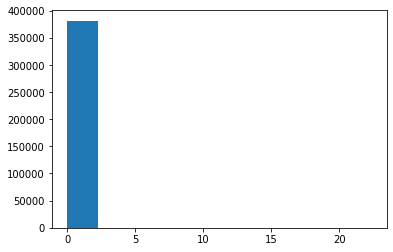

In [ ]:
plt.hist(cltv_df['expected_purc_1_week'])

In [ ]:
cltv_final = cltv_df.merge(cltv, on="customer_id", how="left")
#merging our real dataset and cltv_df data.
cltv_final

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv
0,1,31.142857,31.428571,2,9480.000000,6.451636e-02,2.545476e-01,11338.356659,8.869929e+03
1,10,6.000000,8.000000,2,11295.000000,2.292732e-01,8.721868e-01,13508.852668,3.322535e+04
2,100,3.285714,31.285714,42,11369.642857,3.386397e-40,1.305871e-39,11459.077572,4.336726e-35
3,100001,24.714286,32.857143,3,14933.333333,7.902427e-02,3.111992e-01,16764.747600,1.595096e+04
4,100004,0.428571,25.285714,11,8435.636364,1.241306e-19,4.801857e-19,8694.796275,1.219515e-14
...,...,...,...,...,...,...,...,...,...
381689,99992,5.428571,34.714286,6,39660.000000,2.136418e-05,8.377807e-05,41950.741580,1.062407e+01
381690,99994,10.571429,29.285714,4,29090.000000,1.823724e-02,7.152140e-02,31685.459648,6.852975e+03
381691,99995,6.000000,31.285714,5,22968.000000,3.415837e-04,1.338786e-03,24578.778908,9.934107e+01
381692,99996,10.285714,11.571429,16,178837.500000,1.063935e+00,3.942295e+00,182575.568442,1.915728e+06


- clv값을 0-1사이의 값으로 조정

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
#score between 0-1 ,1 is best 0 is worst. You can change by your wish, if you want you can score between 0-100 .
scaler.fit(cltv_final[['clv']])
cltv_final['scaled_clv'] = scaler.transform(cltv_final[['clv']])
cltv_final.sort_values(by="scaled_clv", ascending=False).head()

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv
368438,82872,0.142857,0.142857,8,372937.500000,22.378048,41.967928,388860.252493,2.372066e+07,1.000000
224797,38917,0.142857,0.142857,3,413100.000000,10.414029,21.510070,463736.433923,1.534842e+07,0.647048
101280,230370,22.857143,23.142857,23,902391.304348,0.949085,3.632851,915429.166946,9.473867e+06,0.399393
280496,460470,14.285714,14.285714,14,915000.000000,0.933432,3.512292,936922.239403,9.033834e+06,0.380842
112398,244597,10.142857,11.428571,16,830100.000000,1.070770,3.964251,847450.180020,8.926978e+06,0.376338


- 고객들을 clv에 따라 A,B,C,D그룹으로 나눔

In [ ]:
cltv_final["segment"] = pd.qcut(cltv_final["scaled_clv"], 4, labels=["D", "C", "B", "A"])
cltv_final.head()
cltv_final.sort_values(by="scaled_clv", ascending=False).head(10)

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv,segment
368438,82872,0.142857,0.142857,8,372937.500000,22.378048,41.967928,388860.252493,2.372066e+07,1.000000,A
224797,38917,0.142857,0.142857,3,413100.000000,10.414029,21.510070,463736.433923,1.534842e+07,0.647048,A
101280,230370,22.857143,23.142857,23,902391.304348,0.949085,3.632851,915429.166946,9.473867e+06,0.399393,A
280496,460470,14.285714,14.285714,14,915000.000000,0.933432,3.512292,936922.239403,9.033834e+06,0.380842,A
112398,244597,10.142857,11.428571,16,830100.000000,1.070770,3.964251,847450.180020,8.926978e+06,0.376338,A
176873,327425,11.285714,12.285714,13,935261.538462,0.916129,3.421295,959437.437103,8.874239e+06,0.374114,A
127911,264503,13.000000,14.285714,22,690770.000000,1.197385,4.474626,701210.867769,8.490634e+06,0.357943,A
366592,80500,0.142857,0.285714,2,413100.000000,3.635831,8.947659,494013.617872,7.638445e+06,0.322017,A
265448,44112,0.142857,0.142857,2,229500.000000,7.702787,16.691633,274452.699288,7.280607e+06,0.306931,A
238854,407048,0.142857,0.142857,2,229500.000000,7.702787,16.691633,274452.699288,7.280607e+06,0.306931,A


In [ ]:
print(cltv_final['scaled_clv'].median())
print(cltv_final['scaled_clv'].mean())

4.277890712365396e-06
0.0008488832514610865


(array([3.81564e+05, 1.06000e+02, 1.30000e+01, 9.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

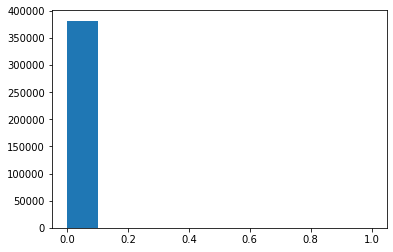

In [ ]:
plt.hist(cltv_final['scaled_clv'])

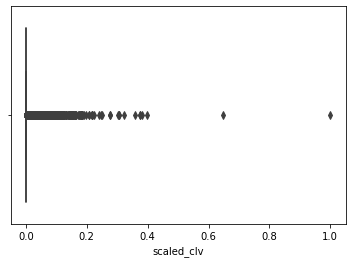

In [ ]:
sns.boxplot( cltv_final['scaled_clv'])

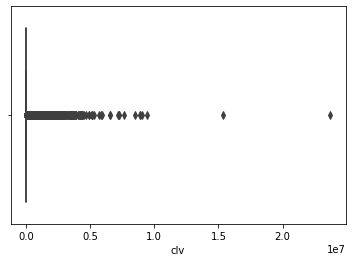

In [ ]:
sns.boxplot( cltv_final['clv'])

## 2) cashback lifetime package_ 최근 방문일 = 마지막날

### RTFM 구하기

In [ ]:
import datetime as dt

# 최근 방문일
last =pd.to_datetime('2020-04-01 23:59:14.018000')

## 각 고객별 최근방문일을 알아보자.
recency_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].max()) ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 송장날짜에 max를 적용한다.
recency_df.columns = ['customer_id', 'LastPurchaseDate']
# 최근 방문일로부터 얼마나 지났는지 
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (last - x).days)
recency_df.drop(columns =['LastPurchaseDate'],inplace = True )

## 각 고객별 구매횟수 & 금액 알아보자.
frequency_df = pd.DataFrame(data.groupby('customer_id', as_index=False)['created_at'].nunique())

money = pd.DataFrame(data.groupby('customer_id',as_index=False)['post_discount'].sum())

# 현재 - 첫구매
min_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].min())
min_df['T'] = min_df['created_at'].apply(lambda x: (last - x).days)
min_df.drop(columns =['created_at'],inplace = True )


In [ ]:
min_df.head(3)

,customer_id,T
0,1,1095
1,10,931
2,100,1094


In [ ]:
## 데이터 병합
cltv_df = pd.merge(recency_df, min_df, how='left', on='customer_id') # money에 recency합치기
cltv_df = pd.merge(cltv_df, frequency_df, how ='left', on='customer_id') # frequency합치기
cltv_df = pd.merge(cltv_df,money,how = 'left', on='customer_id') # money합치기

In [ ]:
cltv_df.set_index('customer_id', inplace = True)
cltv_df.columns = ['recency', 'T', 'frequency','monetary'] # 열의 이름 바꿔주기

#Expressing "monetary value" as average earnings per purchase - monetary평균으로
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]
# selection of monetary values greater than zero - 0인 애들은 없애기   # 1366 행 제거됨
cltv_df = cltv_df[cltv_df["monetary"] > 0]
# Expression of "recency "and "T" in weekly terms - 일주일 단위로 
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7
#frequency must be greater than 1. - 1번 이상 구매자만   # 163227 행 제거됨
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

cltv_df.head()

,recency,T,frequency,monetary
customer_id,,,,
1,31.142857,31.428571,2,9480.000000
10,6.000000,8.000000,2,11295.000000
100,3.285714,31.285714,42,11369.642857
100001,24.714286,32.857143,3,14933.333333
100004,0.428571,25.285714,11,8435.636364


In [ ]:
print(cltv_df.shape)

(544921, 5)


### BG/NBD

In [ ]:
# pip install lifetimes

In [ ]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.001)
#setting up the model
bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])
#fitting of all dataset

<lifetimes.BetaGeoFitter: fitted with 381694 subjects, a: 0.94, alpha: 0.01, b: 7.46, r: 0.27>

In [ ]:
cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                              cltv_df['frequency'],
                                              cltv_df['recency'],
                                              cltv_df['T'])
# 위의 함수 = predict 같은 거임 

cltv_df['expected_purc_1_month'] = bgf.predict(4,
 cltv_df['frequency'],
 cltv_df['recency'],
 cltv_df['T'])

In [ ]:
cltv_df

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month
customer_id,,,,,,
1,31.142857,31.428571,2,9480.000000,6.451636e-02,2.545476e-01
10,6.000000,8.000000,2,11295.000000,2.292732e-01,8.721868e-01
100,3.285714,31.285714,42,11369.642857,3.386397e-40,1.305871e-39
100001,24.714286,32.857143,3,14933.333333,7.902427e-02,3.111992e-01
100004,0.428571,25.285714,11,8435.636364,1.241306e-19,4.801857e-19
...,...,...,...,...,...,...
99992,5.428571,34.714286,6,39660.000000,2.136418e-05,8.377807e-05
99994,10.571429,29.285714,4,29090.000000,1.823724e-02,7.152140e-02
99995,6.000000,31.285714,5,22968.000000,3.415837e-04,1.338786e-03


In [ ]:
# 한달 매출이 어떻게 될까?
bgf.predict(4,cltv_df['frequency'],cltv_df['recency'],cltv_df['T']).sum()  # 4 = 4주

87023.20060081087

In [ ]:
from lifetimes.plotting import plot_period_transactions

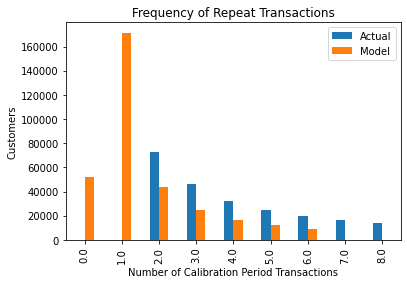

In [ ]:
plot_period_transactions(bgf)
plt.show()

### Gamma/Gamma

In [ ]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 381694 subjects, p: 2.64, q: 0.14, v: 2.59>

In [ ]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],cltv_df['monetary'])
cltv_df.head(10)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit
customer_id,,,,,,,
1,31.142857,31.428571,2,9480.000000,6.451636e-02,2.545476e-01,11338.356659
10,6.000000,8.000000,2,11295.000000,2.292732e-01,8.721868e-01,13508.852668
100,3.285714,31.285714,42,11369.642857,3.386397e-40,1.305871e-39,11459.077572
100001,24.714286,32.857143,3,14933.333333,7.902427e-02,3.111992e-01,16764.747600
100004,0.428571,25.285714,11,8435.636364,1.241306e-19,4.801857e-19,8694.796275
100005,8.428571,23.428571,11,14604.636364,8.846660e-05,3.413659e-04,15053.142756
100006,12.857143,28.285714,7,11925.714286,1.134538e-02,4.423150e-02,12511.575131
100008,0.571429,7.571429,7,16081.428571,1.068394e-07,3.918948e-07,16871.306939
10001,8.000000,15.428571,5,8900.000000,9.347632e-02,3.592606e-01,9524.509863


In [ ]:
cltv = ggf.customer_lifetime_value(bgf,
 cltv_df['frequency'],
 cltv_df['recency'],
 cltv_df['T'],
 cltv_df['monetary'],
 time=3, # 3 Months
 freq='W', # Frequency of T ,in this case it is 'weekly'
 discount_rate=0.01)
cltv = cltv.reset_index()
cltv.head()

,customer_id,clv
0,1,8.869929e+03
1,10,3.322535e+04
2,100,4.336726e-35
3,100001,1.595096e+04
4,100004,1.219515e-14


(array([3.812e+05, 3.180e+02, 8.300e+01, 6.700e+01, 1.500e+01, 7.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  2.23780482,  4.47560964,  6.71341446,  8.95121927,
        11.18902409, 13.42682891, 15.66463373, 17.90243855, 20.14024337,
        22.37804819]),
 <a list of 10 Patch objects>)

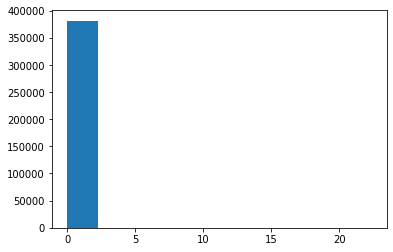

In [ ]:
plt.hist(cltv_df['expected_purc_1_week'])

In [ ]:
cltv_final = cltv_df.merge(cltv, on="customer_id", how="left")
#merging our real dataset and cltv_df data.
cltv_final

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv
0,1,31.142857,31.428571,2,9480.000000,6.451636e-02,2.545476e-01,11338.356659,8.869929e+03
1,10,6.000000,8.000000,2,11295.000000,2.292732e-01,8.721868e-01,13508.852668,3.322535e+04
2,100,3.285714,31.285714,42,11369.642857,3.386397e-40,1.305871e-39,11459.077572,4.336726e-35
3,100001,24.714286,32.857143,3,14933.333333,7.902427e-02,3.111992e-01,16764.747600,1.595096e+04
4,100004,0.428571,25.285714,11,8435.636364,1.241306e-19,4.801857e-19,8694.796275,1.219515e-14
...,...,...,...,...,...,...,...,...,...
381689,99992,5.428571,34.714286,6,39660.000000,2.136418e-05,8.377807e-05,41950.741580,1.062407e+01
381690,99994,10.571429,29.285714,4,29090.000000,1.823724e-02,7.152140e-02,31685.459648,6.852975e+03
381691,99995,6.000000,31.285714,5,22968.000000,3.415837e-04,1.338786e-03,24578.778908,9.934107e+01
381692,99996,10.285714,11.571429,16,178837.500000,1.063935e+00,3.942295e+00,182575.568442,1.915728e+06


- clv값을 0-1사이의 값으로 조정

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
#score between 0-1 ,1 is best 0 is worst. You can change by your wish, if you want you can score between 0-100 .
scaler.fit(cltv_final[['clv']])
cltv_final['scaled_clv'] = scaler.transform(cltv_final[['clv']])
cltv_final.sort_values(by="scaled_clv", ascending=False).head()

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv
368438,82872,0.142857,0.142857,8,372937.500000,22.378048,41.967928,388860.252493,2.372066e+07,1.000000
224797,38917,0.142857,0.142857,3,413100.000000,10.414029,21.510070,463736.433923,1.534842e+07,0.647048
101280,230370,22.857143,23.142857,23,902391.304348,0.949085,3.632851,915429.166946,9.473867e+06,0.399393
280496,460470,14.285714,14.285714,14,915000.000000,0.933432,3.512292,936922.239403,9.033834e+06,0.380842
112398,244597,10.142857,11.428571,16,830100.000000,1.070770,3.964251,847450.180020,8.926978e+06,0.376338


- 고객들을 clv에 따라 A,B,C,D그룹으로 나눔

In [ ]:
cltv_final["segment"] = pd.qcut(cltv_final["scaled_clv"], 4, labels=["D", "C", "B", "A"])
cltv_final.head()
cltv_final.sort_values(by="scaled_clv", ascending=False).head(10)

,customer_id,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv,segment
368438,82872,0.142857,0.142857,8,372937.500000,22.378048,41.967928,388860.252493,2.372066e+07,1.000000,A
224797,38917,0.142857,0.142857,3,413100.000000,10.414029,21.510070,463736.433923,1.534842e+07,0.647048,A
101280,230370,22.857143,23.142857,23,902391.304348,0.949085,3.632851,915429.166946,9.473867e+06,0.399393,A
280496,460470,14.285714,14.285714,14,915000.000000,0.933432,3.512292,936922.239403,9.033834e+06,0.380842,A
112398,244597,10.142857,11.428571,16,830100.000000,1.070770,3.964251,847450.180020,8.926978e+06,0.376338,A
176873,327425,11.285714,12.285714,13,935261.538462,0.916129,3.421295,959437.437103,8.874239e+06,0.374114,A
127911,264503,13.000000,14.285714,22,690770.000000,1.197385,4.474626,701210.867769,8.490634e+06,0.357943,A
366592,80500,0.142857,0.285714,2,413100.000000,3.635831,8.947659,494013.617872,7.638445e+06,0.322017,A
265448,44112,0.142857,0.142857,2,229500.000000,7.702787,16.691633,274452.699288,7.280607e+06,0.306931,A
238854,407048,0.142857,0.142857,2,229500.000000,7.702787,16.691633,274452.699288,7.280607e+06,0.306931,A


In [ ]:
print(cltv_final['scaled_clv'].median())
print(cltv_final['scaled_clv'].mean())

4.277890712365396e-06
0.0008488832514610865


(array([3.81564e+05, 1.06000e+02, 1.30000e+01, 9.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

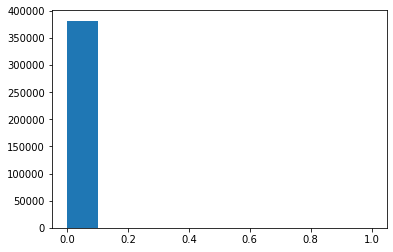

In [ ]:
plt.hist(cltv_final['scaled_clv'])

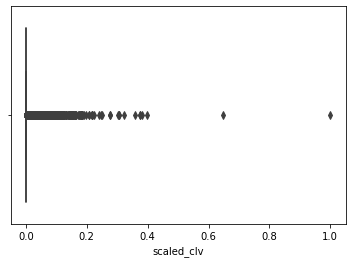

In [ ]:
sns.boxplot( cltv_final['scaled_clv'])

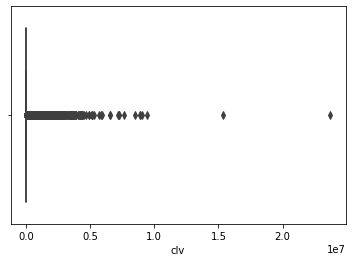

In [ ]:
sns.boxplot( cltv_final['clv'])

## 3) 전통적인 CLV 계산식

In [ ]:
# 컬럼 소개 year = 구매한 달, month = 구매 년-월, 
# MonthStarted = 첫 구매달, MonthPassed = 첫 구매로부터 지난 개월 수

data['year'] = data['created_at'].dt.to_period(freq='A')
data['month'] = data['created_at'].dt.to_period(freq='M')

month_group = data.groupby('customer_id')['month']
data['MonthStarted'] = month_group.transform(np.min)   # MonthStarted = 첫 구매달

data['MonthPassed'] = (data['month'].dt.year - data['MonthStarted'].dt.year) * 12 + (data['month'].dt.month - data['MonthStarted'].dt.month) #MonthPassed = 첫 구매로부터 지난 개월 수

In [ ]:
def get_unique_no(x):
    return len(np.unique(x))

female_group = data.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index()

femonth0 = female_df[female_df['MonthPassed'] == 0]['customer_id'].reset_index(drop=True)
femonth1 = female_df[female_df['MonthPassed'] == 1]['customer_id'].reset_index(drop=True)

In [ ]:
female_df[female_df['MonthPassed'] == 0]

,MonthStarted,MonthPassed,customer_id
0,2019-08,0,194355
8,2019-09,0,54259
15,2019-10,0,47654
21,2019-11,0,44953
26,2019-12,0,54347
30,2020-01,0,70895
33,2020-02,0,47540
35,2020-03,0,27016


In [ ]:
def get_unique_no(x):
    return len(np.unique(x))


# 1. 고객 아이디 당 첫 구매일과 첫 구매로부터 지난 개월 수(MonthPassed)를 그룹화 하기
female_group = data.groupby(['MonthStarted', 'MonthPassed'])
female_df = female_group['customer_id'].apply(get_unique_no).reset_index() # 사람 '수'

#2. 첫 구매로부터 지난 개월 수에 따라 고객들 묶기
femonth0 = female_df[female_df['MonthPassed'] == 0]['customer_id'].reset_index(drop=True)  # 
femonth1 = female_df[female_df['MonthPassed'] == 1]['customer_id'].reset_index(drop=True)
femonth2 = female_df[female_df['MonthPassed'] == 2]['customer_id'].reset_index(drop=True)
femonth3 = female_df[female_df['MonthPassed'] == 3]['customer_id'].reset_index(drop=True)
femonth4 = female_df[female_df['MonthPassed'] == 4]['customer_id'].reset_index(drop=True)
femonth5 = female_df[female_df['MonthPassed'] == 5]['customer_id'].reset_index(drop=True)
femonth6 = female_df[female_df['MonthPassed'] == 6]['customer_id'].reset_index(drop=True)
femonth7 = female_df[female_df['MonthPassed'] == 7]['customer_id'].reset_index(drop=True)

monthDate = ['1 Month', '2 Month', '3 Month', '4 Month', '5 Month', '6 Month', '7 Month']

fmonthPassed = []

fmonthPassed.append((femonth1.div(femonth0) * 100).mean())  # 첫구매로부터  1개월 지난 고객을 첫구매로부터  0개월 지난 고객으로 나누기
fmonthPassed.append((femonth2.div(femonth0) * 100).mean())
fmonthPassed.append((femonth3.div(femonth0) * 100).mean())
fmonthPassed.append((femonth4.div(femonth0) * 100).mean())
fmonthPassed.append((femonth5.div(femonth0) * 100).mean())
fmonthPassed.append((femonth6.div(femonth0) * 100).mean())
fmonthPassed.append((femonth7.div(femonth0) * 100).mean())

monthDate = pd.Series(monthDate)
fmonthPassed = pd.Series(fmonthPassed)


In [ ]:
#CLV = (monetary) / (1-유지율+할인율)

# 고객의 평균 유지율, 재구매 line-plot의 코드에서 가져옴
# fmonthPassed : 각 개월이 지났을때의 구매율을 담은 리스트
fmonthPassed.mean() 
retention_rate = round(fmonthPassed.mean(),0)/100

cust_disc = data.groupby('customer_id')['discount_rate'].mean()      #discount_rate
discount_rate = round(cust_disc.mean(),0)/100

In [ ]:
last =pd.to_datetime('2020-04-01 23:59:14.018000')

## 각 고객별 최근방문일을 알아보자.
recency_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].max()) ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 송장날짜에 max를 적용한다.
recency_df.columns = ['customer_id', 'LastPurchaseDate']
# 최근 방문일로부터 얼마나 지났는지 
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (last - x).days)
recency_df.drop(columns =['LastPurchaseDate'],inplace = True )

## 각 고객별 구매횟수 & 금액 알아보자.
frequency_df = pd.DataFrame(data.groupby('customer_id', as_index=False)['created_at'].nunique())

money = pd.DataFrame(data.groupby('customer_id',as_index=False)['post_discount'].sum())
promotion = pd.DataFrame(data.groupby('customer_id', as_index = False)['total_promotion'].sum())
# 현재 - 첫구매
min_df = pd.DataFrame(data.groupby('customer_id',as_index=False)['created_at'].min())
min_df['T'] = min_df['created_at'].apply(lambda x: (last - x).days)
min_df.drop(columns =['created_at'],inplace = True )

## 데이터 병합
test = pd.merge(recency_df, min_df, how='left', on='customer_id') # money에 recency합치기
test = pd.merge(test, frequency_df, how ='left', on='customer_id') # frequency합치기
test = pd.merge(test,money,how = 'left', on='customer_id') # money합치기
test = pd.merge(test, promotion, how = 'left', on = 'customer_id') # promotion 합치기


test.columns = ['customer_id','recency', 'T', 'frequency','monetary','promotion'] # 열의 이름 바꿔주기

#Expressing "monetary value" as average earnings per purchase - monetary평균으로

test["monetary"] = test["monetary"] - test['promotion'] / test['frequency']

#frequency must be greater than 1. - 1번 이상 구매자만
test = test[(test['frequency'] > 1)]
test = test.drop(test.columns[5], axis = 1)
test.head(3)

,customer_id,recency,T,frequency,monetary
0,1,218,220,2,16275.000000
1,10,42,56,2,21310.000000
2,100,23,219,42,476527.809524


In [ ]:
# CLV = (monetary) / (1-유지율 + i)
test['clv'] = test['monetary'] / (1- retention_rate + 0.01)

In [ ]:
test

,customer_id,recency,T,frequency,monetary,clv
0,1,218,220,2,1.627500e+04,2.625000e+04
1,10,42,56,2,2.131000e+04,3.437097e+04
2,100,23,219,42,4.765278e+05,7.685932e+05
6,100001,173,230,3,4.323333e+04,6.973118e+04
9,100004,3,177,11,9.184109e+04,1.481308e+05
...,...,...,...,...,...,...
541012,99992,38,243,6,2.365465e+05,3.815266e+05
541014,99994,74,205,4,1.148425e+05,1.852298e+05
541015,99995,42,219,5,1.127140e+05,1.817968e+05
541016,99996,72,81,16,2.855400e+06,4.605484e+06


## 4) cashback_rftm 계산식을 이용하여 구하기

In [ ]:
# 캐쉬백을 사용한적이 있는 사람들만의 컬럼
data_cashback = data[data['is_cashback']== True]
data_cashback.head(3)

,customer_id,created_at,pre_discount,post_discount,cashback_amount,discount_amount,total_promotion,push_permission,gender,is_foreigner,birthday,sign_up_date,merchant_id,count,weekday,hour,month,days,is_covid_A,is_covid_B,range,cashback_rate,is_cashback,discount_rate,is_discount,promotion_rate,is_promotion,age,age_category,year,MonthStarted,MonthPassed
0,207317,2020-03-22 10:27:52.498,36236,36236,1087,0,1087,True,female,False,1957-11-05,2019-11-30 16:48:19.339,I,1,Sun,10,2020-03,2020-03-22,True,True,under_$100,2.999779,True,0.0,False,2.999779,True,63,60,2020,2019-12,3
1,95246,2020-03-12 09:41:09.845,12900,12900,387,0,387,True,female,False,1983-10-23,2019-07-09 08:21:14.098,F,1,Thu,9,2020-03,2020-03-12,True,False,under_$100,3.000000,True,0.0,False,3.000000,True,37,30,2020,2020-01,2
2,208074,2020-02-01 08:54:53.246,7500,7500,225,0,225,True,female,False,1975-07-06,2019-08-15 01:02:13.336,I,1,Sat,8,2020-02,2020-02-01,True,False,under_$10,3.000000,True,0.0,False,3.000000,True,45,40,2020,2019-08,6


In [ ]:
data_cashback.to_csv('data_cashback.csv')

In [ ]:
# 컬럼 소개 year = 구매한 달, month = 구매 년-월, 
# MonthStarted = 첫 구매달, MonthPassed = 첫 구매로부터 지난 개월 수

data_cashback['year'] = data_cashback['created_at'].dt.to_period(freq='A')   # A: year
data_cashback['month'] = data_cashback['created_at'].dt.to_period(freq='M')   # M: year - month 


month_group = data_cashback.groupby('customer_id')['month']


# 캐쉬백이 시작한 달

data_cashback['MonthStarted_cash'] = month_group.transform(np.min)   

data_cashback['MonthPassed_cash'] = (data_cashback['month'].dt.year - data_cashback['MonthStarted_cash'].dt.year) * 12 + (data_cashback['month'].dt.month - data_cashback['MonthStarted_cash'].dt.month)

In [ ]:
last =pd.to_datetime('2020-04-01 23:59:14.018000')


## 각 고객별 최근방문일을 알아보자.
recency_df = pd.DataFrame(data_cashback.groupby('customer_id',as_index=False)['created_at'].max()) ## 아이디로 그룹화 한다음 최근방문일을 구해야 하므로 송장날짜에 max를 적용한다.
recency_df.columns = ['customer_id', 'LastPurchaseDate']
# 최근 방문일로부터 얼마나 지났는지 
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (last - x).days)
recency_df.drop(columns =['LastPurchaseDate'],inplace = True )

## 각 고객별 구매횟수 & 금액 알아보자.
frequency_df = pd.DataFrame(data_cashback.groupby('customer_id', as_index=False)['created_at'].nunique())

money = pd.DataFrame(data_cashback.groupby('customer_id',as_index=False)['post_discount'].sum())

# 현재 - 첫구매
min_df = pd.DataFrame(data_cashback.groupby('customer_id',as_index=False)['created_at'].min())
min_df['T'] = min_df['created_at'].apply(lambda x: (last - x).days)
min_df.drop(columns =['created_at'],inplace = True )


## 데이터 병합
test_cashback = pd.merge(recency_df, min_df, how='left', on='customer_id') # money에 recency합치기
test_cashback = pd.merge(test_cashback, frequency_df, how ='left', on='customer_id') # frequency합치기
test_cashback = pd.merge(test_cashback,money,how = 'left', on='customer_id') # money합치기

test_cashback.columns = ['customer_id','recency', 'T', 'frequency','monetary'] # 열의 이름 바꿔주기

#Expressing "monetary value" as average earnings per purchase - monetary평균으로
test_cashback["monetary"] = test_cashback["monetary"] / test_cashback["frequency"]

#frequency must be greater than 1. - 1번 이상 구매자만
test_cashback = test_cashback[(test_cashback['frequency'] > 1)]
test_cashback.head(3)

,customer_id,recency,T,frequency,monetary
1,100,23,30,2,4995.000000
2,100004,12,32,4,11550.000000
3,100008,4,49,6,17778.333333


In [ ]:
test_cashback.columns = ['customer_id','recency_cashback','T_cashback','freqeuncy_cashback','monetary_cashback']
test_cashback.head(3)

,customer_id,recency_cashback,T_cashback,freqeuncy_cashback,monetary_cashback
1,100,23,30,2,4995.000000
2,100004,12,32,4,11550.000000
3,100008,4,49,6,17778.333333


# **5. Segment**


In [ ]:
test

,customer_id,recency,T,frequency,monetary,clv
0,1,218,220,2,1.627500e+04,2.625000e+04
1,10,42,56,2,2.131000e+04,3.437097e+04
2,100,23,219,42,4.765278e+05,7.685932e+05
6,100001,173,230,3,4.323333e+04,6.973118e+04
9,100004,3,177,11,9.184109e+04,1.481308e+05
...,...,...,...,...,...,...
541012,99992,38,243,6,2.365465e+05,3.815266e+05
541014,99994,74,205,4,1.148425e+05,1.852298e+05
541015,99995,42,219,5,1.127140e+05,1.817968e+05
541016,99996,72,81,16,2.855400e+06,4.605484e+06


In [ ]:
# 고객 세그먼트
test['monetary'].describe()

count    3.806930e+05
mean     2.648935e+05
std      6.152494e+05
min     -6.040000e+04
25%      4.367550e+04
50%      1.086286e+05
75%      2.822040e+05
max      1.122582e+08
Name: monetary, dtype: float64

In [ ]:
def get_score(v):
  if v >= 28220 :
    m_score = 4
  elif 28220 > v >= 10863 :
    m_score= 3
  elif 10863 > v >= 4368 :
    m_score = 2
  else :
    m_score = 1
  return m_score

test["m_socre"] = test["monetary"].apply(lambda v: get_score(v))
test = test.drop(test.columns[6], axis = 1)

test

,customer_id,recency,T,frequency,monetary,clv,m_socre
0,1,218,220,2,1.627500e+04,2.625000e+04,3
1,10,42,56,2,2.131000e+04,3.437097e+04,3
2,100,23,219,42,4.765278e+05,7.685932e+05,4
6,100001,173,230,3,4.323333e+04,6.973118e+04,4
9,100004,3,177,11,9.184109e+04,1.481308e+05,4
...,...,...,...,...,...,...,...
541012,99992,38,243,6,2.365465e+05,3.815266e+05,4
541014,99994,74,205,4,1.148425e+05,1.852298e+05,4
541015,99995,42,219,5,1.127140e+05,1.817968e+05,4
541016,99996,72,81,16,2.855400e+06,4.605484e+06,4


In [ ]:
test['frequency'].describe()

count    380693.000000
mean         14.328004
std          23.772806
min           2.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        2705.000000
Name: frequency, dtype: float64

In [ ]:
def get_score(v):
  if v >= 16 :
    f_score = 4
  elif 16 > v >= 6 :
    f_score= 3
  elif 6 > v >= 3 :
    f_score = 2
  else :
    f_score = 1
  return f_score

test["f_socre"] = test["frequency"].apply(lambda v: get_score(v))
test

,customer_id,recency,T,frequency,monetary,clv,m_socre,f_socre
0,1,218,220,2,1.627500e+04,2.625000e+04,3,1
1,10,42,56,2,2.131000e+04,3.437097e+04,3,1
2,100,23,219,42,4.765278e+05,7.685932e+05,4,4
6,100001,173,230,3,4.323333e+04,6.973118e+04,4,2
9,100004,3,177,11,9.184109e+04,1.481308e+05,4,3
...,...,...,...,...,...,...,...,...
541012,99992,38,243,6,2.365465e+05,3.815266e+05,4,3
541014,99994,74,205,4,1.148425e+05,1.852298e+05,4,2
541015,99995,42,219,5,1.127140e+05,1.817968e+05,4,2
541016,99996,72,81,16,2.855400e+06,4.605484e+06,4,4


In [ ]:
test['recency'].describe()

count    380693.000000
mean         55.411174
std          56.714514
min           1.000000
25%          12.000000
50%          37.000000
75%          78.000000
max         244.000000
Name: recency, dtype: float64

In [ ]:
def get_score(v):
  if v >= 78 :
    r_score = 4
  elif 78 > v >= 37 :
    r_score= 3
  elif 37 > v >= 12 :
    r_score = 2
  else :
    r_score = 1
  return r_score

test["r_socre"] = test["recency"].apply(lambda v: get_score(v))
test


,customer_id,recency,T,frequency,monetary,clv,m_socre,f_socre,r_socre
0,1,218,220,2,1.627500e+04,2.625000e+04,3,1,4
1,10,42,56,2,2.131000e+04,3.437097e+04,3,1,3
2,100,23,219,42,4.765278e+05,7.685932e+05,4,4,2
6,100001,173,230,3,4.323333e+04,6.973118e+04,4,2,4
9,100004,3,177,11,9.184109e+04,1.481308e+05,4,3,1
...,...,...,...,...,...,...,...,...,...
541012,99992,38,243,6,2.365465e+05,3.815266e+05,4,3,3
541014,99994,74,205,4,1.148425e+05,1.852298e+05,4,2,3
541015,99995,42,219,5,1.127140e+05,1.817968e+05,4,2,3
541016,99996,72,81,16,2.855400e+06,4.605484e+06,4,4,3


In [ ]:
#평균 할인
d_rate = data.groupby('customer_id')['discount_amount'].mean()
d_rate = pd.DataFrame(d_rate).reset_index()

In [ ]:
# 평균 캐시백
c_rate=data.groupby('customer_id')['cashback_amount'].mean()
c_rate= pd.DataFrame(c_rate).reset_index()

In [ ]:
rate = pd.merge(d_rate, c_rate, on = 'customer_id', how = 'left')

In [ ]:
rate

,customer_id,discount_amount,cashback_amount
0,1,2685.000000,0.000000
1,10,1000.000000,280.000000
2,100,990.071429,7.119048
3,1000,900.000000,0.000000
4,10000,1050.000000,0.000000
...,...,...,...
541014,99994,1517.500000,0.000000
541015,99995,2126.000000,0.000000
541016,99996,6000.000000,0.000000
541017,99998,1317.500000,118.000000


In [ ]:
# 푸시 비율
chai = pd.read_csv('chai.csv')


In [ ]:
#chai['sell'] = chai['covid_buy'] + chai['covid_x_num'] 

chai = chai[['customer_id','push_num','age','age_category','gender','sell']]

In [ ]:
chai['push_rate'] = (chai['push_num'] / chai['sell']) * 100

In [ ]:
chai['push_rate'].describe()

count    541019.000000
mean         41.971169
std          49.351215
min           0.000000
25%           0.000000
50%           0.000000
75%         100.000000
max         100.000000
Name: push_rate, dtype: float64

In [ ]:
chai = df.astype({'시가':'int'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541019 entries, 0 to 541018
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   customer_id   541019 non-null  int64  
 1   push_num      541019 non-null  float64
 2   age           541019 non-null  int64  
 3   age_category  541019 non-null  int64  
 4   gender        541019 non-null  object 
 5   sell          541019 non-null  float64
 6   push_rate     541019 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 28.9+ MB


In [ ]:
rate = rate.astype({'customer':'int'})

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541019 entries, 0 to 541018
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   customer_id      541019 non-null  object 
 1   discount_amount  541019 non-null  float64
 2   cashback_amount  541019 non-null  float64
dtypes: float64(2), object(1)
memory usage: 16.5+ MB


In [ ]:
chai = pd.merge(chai, rate, on = 'customer_id', how = 'left')

## 다중회귀분석

In [ ]:
last_last = pd.read_csv('last_last2.csv')

In [ ]:
last_last

,Unnamed: 0,Unnamed: 0.1,customer_id,push_num,age,age_category,gender,sell,push_rate,discount_mean,cashback_mean,recency,T,frequency,monetary,clv,f_socre,r_socre,discount_amount,m_socre
0,0,0,207317,13.0,63,60,female,13.0,1.0,615.384615,447.538462,10,121,13,283561.076923,4.573566e+05,3,1,5000,4
1,1,1,95246,20.0,37,30,female,20.0,1.0,100.000000,987.950000,1,90,20,518215.050000,8.358307e+05,4,1,0,4
2,2,2,208074,47.0,45,40,female,47.0,1.0,1089.148936,80.872340,30,230,47,839751.978723,1.354439e+06,4,2,5000,4
3,3,3,15552,0.0,24,20,male,24.0,0.0,291.666667,378.333333,6,219,24,360970.000000,5.822097e+05,4,1,3000,4
4,4,4,511595,3.0,21,20,female,3.0,1.0,0.000000,426.000000,18,20,3,59974.000000,9.673226e+04,2,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541014,541014,541014,351958,0.0,34,30,female,1.0,0.0,2000.000000,0.000000,238,238,1,67900.000000,1.095161e+05,1,4,2000,4
541015,541015,541015,254863,0.0,39,30,male,1.0,0.0,5000.000000,0.000000,244,244,1,-4000.000000,-6.451613e+03,1,4,5000,1
541016,541016,541016,310276,1.0,22,20,male,1.0,1.0,5000.000000,0.000000,93,93,1,138000.000000,2.225806e+05,1,4,5000,4
541017,541017,541017,434118,1.0,25,20,male,1.0,1.0,2000.000000,0.000000,40,40,1,34000.000000,5.483871e+04,1,3,2000,4


In [ ]:
last_last = last_last.drop(columns= ['Unnamed: 0','Unnamed: 0.1','age','push_num','sell', 'T'])
last_last = last_last.rename(columns = {'push_rate': 'is_push', 'discount_amount':'CAC'})
last_last = last_last.astype({'is_push': 'bool'})
last_last = last_last.drop(columns= ['customer_id'])

In [ ]:
last_last['is_CAC'] = last_last['CAC'] > 0
last_last = last_last.drop(columns= ['CAC'])
last_last = pd.get_dummies(last_last, columns = ['is_push','age_category','gender','f_socre','r_socre','m_socre','is_CAC'])

In [ ]:
last_last['is_discount'] = last_last['discount_mean'] > 0 # 받았냐 안 받았냐
last_last['is_cashback'] = last_last['cashback_mean'] > 0

In [ ]:
last_last = pd.get_dummies(last_last, columns = ['is_discount', 'is_cashback'])

In [ ]:
last_last

,discount_mean,cashback_mean,recency,frequency,monetary,clv,is_push_False,is_push_True,age_category_10,age_category_20,age_category_30,age_category_40,age_category_50,age_category_60,age_category_70,age_category_80,age_category_90,age_category_100,gender_female,gender_male,f_socre_1,f_socre_2,f_socre_3,f_socre_4,r_socre_1,r_socre_2,r_socre_3,r_socre_4,m_socre_1,m_socre_2,m_socre_3,m_socre_4,is_CAC_False,is_CAC_True,is_discount_False,is_discount_True,is_cashback_False,is_cashback_True
0,615.384615,447.538462,10,13,283561.076923,4.573566e+05,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1
1,100.000000,987.950000,1,20,518215.050000,8.358307e+05,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1
2,1089.148936,80.872340,30,47,839751.978723,1.354439e+06,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1
3,291.666667,378.333333,6,24,360970.000000,5.822097e+05,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,1
4,0.000000,426.000000,18,3,59974.000000,9.673226e+04,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541014,2000.000000,0.000000,238,1,67900.000000,1.095161e+05,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0
541015,5000.000000,0.000000,244,1,-4000.000000,-6.451613e+03,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0
541016,5000.000000,0.000000,93,1,138000.000000,2.225806e+05,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0
541017,2000.000000,0.000000,40,1,34000.000000,5.483871e+04,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import statsmodels.api as sm
x = last_last[last_last.columns.difference(['clv'])]
y = last_last[['clv']]
x = sm.add_constant(x, has_constant = 'add')
multi_model = sm.OLS(y, x)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    clv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.167e+34
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:14:34   Log-Likelihood:             1.0664e+07
No. Observations:              541019   AIC:                        -2.133e+07
Df Residuals:                  540990   BIC:                        -2.133e+07
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.534e-10    1.6e-11    -22.079      0.000   -3.85e-10   -3.22e-10
age_category_10    4.777e-10   6.82e-11      7.005      0.000    3.44e-10    6.11e-10
age_category_100  -2.389e-08   6.02e-10    -39.714      0.000   -2.51e-08   -2.27e-08
age_category_20    1.413e-09    6.8e-11     20.784      0.000    1.28e-09    1.55e-09
age_category_30    1.353e-09    6.8e-11     19.900      0.000    1.22e-09    1.49e-09
age_category_40    1.441e-09    6.8e-11     21.202      0.000    1.31e-09    1.57e-09
age_category_50    1.635e-09   6.81e-11     24.018      0.000     1.5e-09    1.77e-09
age_category_60    2.436e-09   6.84e-11     35.601      0.000     2.3e-09    2.57e-09
age_category_70     2.63e-09   7.04e-11     37.385      0.000    2.49e-09    2.77e-09
age_category_80    3.021e-09   8.02e-11     37.665      0.000    2.86e-09    3.18e-09
age_category_90    9.077e-09   1.85e-10     48.946      0.000    8.71e-09    9.44e-09
cashback_mean      2.849e-14   1.45e-15     19.610      0.000    2.56e-14    3.13e-14
discount_mean      -5.32e-14   5.13e-16   -103.696      0.000   -5.42e-14   -5.22e-14
f_socre_1         -5.312e-10   4.59e-12   -115.744      0.000    -5.4e-10   -5.22e-10
f_socre_2         -5.259e-11   4.43e-12    -11.863      0.000   -6.13e-11   -4.39e-11
f_socre_3          1.794e-10   4.42e-12     40.554      0.000    1.71e-10    1.88e-10
f_socre_4         -4.288e-11   4.82e-12     -8.889      0.000   -5.23e-11   -3.34e-11
frequency          4.889e-12   6.93e-14     70.572      0.000    4.75e-12    5.02e-12
gender_female     -1.784e-10   8.06e-12    -22.146      0.000   -1.94e-10   -1.63e-10
gender_male       -1.778e-10   8.06e-12    -22.048      0.000   -1.94e-10   -1.62e-10
is_CAC_False      -2.311e-10   8.31e-12    -27.811      0.000   -2.47e-10   -2.15e-10
is_CAC_True       -1.311e-10   8.32e-12    -15.750      0.000   -1.47e-10   -1.15e-10
is_cashback_False   -2.1e-10   8.12e-12    -25.873      0.000   -2.26e-10   -1.94e-10
is_cashback_True  -1.512e-10   8.12e-12    -18.614      0.000   -1.67e-10   -1.35e-10
is_discount_False -2.035e-10   8.61e-12    -23.627      0.000    -2.2e-10   -1.87e-10
is_discount_True  -1.451e-10   8.52e-12    -17.041      0.000   -1.62e-10   -1.28e-10
is_push_False     -1.782e-10   8.06e-12    -22.117      0.000   -1.94e-10   -1.62e-10
is_push_True       -1.69e-10   8.06e-12    -20.964      0.000   -1.85e-10   -1.53e-10
m_socre_1         -1.014e-10   5.06e-12    -20.036      0.000   -1.11e-10   -9.15e-11
m_socre_2         -9.504e-11   4.74e-12    -20.034      0.000   -1.04e-10   -8.57e-11
m_socre_3         -6.454e-11   4.49e-12    -14.373      0.000   -7.33e-11   -5.57e-11
m_socre_4         -9.137e-11   4.51e-12    -20.280      0.000      -1e-10   -8.25e-11
monetary              1.6129   2.27e-18   7.11e+17      0.000       1.613

In [ ]:
df = last_last
variables = df.columns.difference(['clv']).tolist() ## 설명 변수 리스트
 
y = df['clv'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [ ]:
# 3개 모델과 full모델의 잔차비교

import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label = "3 model")
fitted_multi_model2.resid.plot(label = "full model")
plt.legend()

In [ ]:
# 상관행렬 시각화

import seaborn as sns                        #heatmap 만들기 위한 라이브러리
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(x_data2.corr(), annot = True, cmap = cmap)
plt.show()

In [ ]:
# 변수끼리 산점도를 시각화

sns.pairplot(x_data2)
plt.show()

In [ ]:
from statsmodels.stats.ouliers_influence import variance_inflation_factor 

# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

vif = pd.DataFrame()
vif["VIF Factor"] = [varinace_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data4.columns
vif

In [ ]:
# nox 변수 제거 후 vif 확인

vif = pd.DataFrame()
x_data3 = x_data2.drop("NOX",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

# **6.RFM 세그먼트**

In [ ]:
#  R-F 행렬
rf_matrix = seg.groupby(['r_socre', 'f_socre']).agg({
    'customer_id': 'count', 
    'm_socre': 'sum'}).reset_index()

rf_matrix['avg_sales'] = rf_matrix['m_socre']/rf_matrix['customer_id']
rf_matrix

,r_socre,f_socre,customer_id,m_socre,avg_sales
0,1,1,13207,40965,3.101764
1,1,2,12396,47996,3.871894
2,1,3,24930,99653,3.997312
3,1,4,48227,192908,4.000000
4,2,1,28298,82940,2.930949
5,2,2,23674,91247,3.854313
6,2,3,34366,137337,3.996304
7,2,4,29447,117788,4.000000
8,3,1,53845,144616,2.685783
9,3,2,30466,114481,3.757664


In [ ]:
rf_pivot = rf_matrix.pivot(index='f_socre', columns='r_socre', values='customer_id')  #.fillna(0).sort_index(ascending=False)
    
rf_pivot.style.background_gradient(cmap ='Blues', axis=None, low=0.2)

r_socre,1,2,3,4
f_socre,,,,
1,13207,28298,53845,137681
2,12396,23674,30466,35913
3,24930,34366,30607,19711
4,48227,29447,14173,4078


In [ ]:
rf_pivot = rf_matrix.pivot(index='f_socre', columns='r_socre', values='avg_sales')  #.fillna(0).sort_index(ascending=False)
    
rf_pivot.style.background_gradient(cmap ='Blues', axis=None, low=0.2)

r_socre,1,2,3,4
f_socre,,,,
1,3.101764,2.930949,2.685783,2.790879
2,3.871894,3.854313,3.757664,3.810737
3,3.997312,3.996304,3.985951,3.987469
4,4.000000,4.000000,4.000000,4.000000


In [ ]:
seg['group'] =  np.where((seg['r_socre'] >= 3) &(seg['f_socre'] >= 3) & (seg['m_socre'] >= 3), 'VIP',  # : 우량고객
                             np.where((seg['r_socre'] >= 3)&(seg['m_socre'] >= 3)&(seg['f_socre'] < 3) , 'New',  # 낮은빈도고객: 최신성, 우대서비스 제공,cross-selling 전략으로 핵심 우량 고객 양성 # 짜잘짜잘한(days수가 적게) 마케팅 제공
                                                                                                                  # 빈도를 높이기 위해  # 요일별 할인 # 기간별 할인 
                             np.where((seg['r_socre'] >= 3)&(seg['m_socre'] <3 )&(seg['f_socre'] < 3) , 'Potential',   # 잠재고객 고객 : R이 높지만, F,M이 낮은 고객들
                             np.where((seg['r_socre'] < 3)&(seg['m_socre'] >= 1)&(seg['f_socre'] >= 1) , 'churn',  # 이탈우려고객: R이 낮은 고객, 재활성화를 위한 프로모션, 할인 서비스 등을 제공하는 전략 
                                                                                                                    #-> vip로 전환시키기. 구매 건수 중 69.04%가 할인받은 건수이다(할인에 민감하게 반응)
                              np.where((seg['r_socre'] >= 3)&(seg['m_socre'] < 3)&(seg['f_socre'] >= 3) , 'low_profit'  , # 짠돌이고객: 구매가 망설여지는 고객. 마케팅 비용을 절감하는 디 마케팅 전략
                                    
                                    
                                    'else' )))))

                         
                          

In [ ]:
new = seg[seg['group']=='New']
new

,customer_id,push_num,age,age_category,gender,sell,push_rate,discount_mean,cashback_mean,recency,T,frequency,monetary,clv,f_socre,r_socre,discount_amount,m_socre,group
16,336066,3.0,25,20,female,3.0,1.0,3000.000000,273.0,43,151,3,59927.000000,96656.451613,2,3,5000,4,New
237,142309,2.0,41,40,male,2.0,1.0,1000.000000,576.0,42,48,2,34824.000000,56167.741935,1,3,2000,4,New
247,168010,3.0,22,20,female,3.0,1.0,496.666667,168.0,56,127,3,28055.333333,45250.537634,2,3,1490,3,New
259,228143,0.0,39,30,female,2.0,0.0,1000.000000,163.5,50,54,2,15636.500000,25220.161290,1,3,2000,3,New
354,208590,0.0,30,30,female,3.0,0.0,666.666667,722.0,52,112,3,98711.333333,159211.827957,2,3,2000,4,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541011,520688,1.0,22,20,female,1.0,1.0,3380.000000,0.0,210,210,1,11660.000000,18806.451613,1,4,3380,3,New
541013,492503,0.0,34,30,female,1.0,0.0,3000.000000,0.0,70,70,1,79000.000000,127419.354839,1,3,3000,4,New
541014,351958,0.0,34,30,female,1.0,0.0,2000.000000,0.0,238,238,1,67900.000000,109516.129032,1,4,2000,4,New
541016,310276,1.0,22,20,male,1.0,1.0,5000.000000,0.0,93,93,1,138000.000000,222580.645161,1,4,5000,4,New
